<a href="https://colab.research.google.com/github/NohaAteff/Face-Aging-Using-GANs/blob/main/FaceRecSVMdrMarwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from glob import glob
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')


In [2]:
imgpath = glob('/content/DrMarwa/*.jpg')

In [3]:
len(imgpath)

588

In [5]:
imgpath = sorted(imgpath)

In [6]:
y=[]
for i in range(1,85):
  for j in range(7):
    y.append(i)

In [ ]:
y[0:10]

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2]

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
imgs = pd.DataFrame({'imgPath':imgpath,'ID':y})

In [ ]:
imgs

In [33]:
splitter = pd.DataFrame()

In [ ]:
# del splitter,train,test

In [31]:
train=pd.DataFrame()

In [32]:
test=pd.DataFrame()

In [29]:
del train,test,splitter

In [ ]:
for i in range(len(imgs['ID'].unique())):
  j=[int(i)+1]
  splitter = imgs[imgs.ID.isin(j)==True]
  train = train.append(splitter[0:5])
  test = test.append(splitter[5:7])

In [35]:
train

,imgPath,ID
0,/content/DrMarwa/P0101.jpg,1
1,/content/DrMarwa/P0102.jpg,1
2,/content/DrMarwa/P0103.jpg,1
3,/content/DrMarwa/P0104.jpg,1
4,/content/DrMarwa/P0105.jpg,1
...,...,...
581,/content/DrMarwa/P8401.jpg,84
582,/content/DrMarwa/P8402.jpg,84
583,/content/DrMarwa/P8403.jpg,84
584,/content/DrMarwa/P8404.jpg,84


In [17]:
test

,imgPath,ID
5,/content/DrMarwa/P0106.jpg,1
6,/content/DrMarwa/P0107.jpg,1
12,/content/DrMarwa/P0206.jpg,2
13,/content/DrMarwa/P0207.jpg,2
19,/content/DrMarwa/P0306.jpg,3
...,...,...
573,/content/DrMarwa/P8207.jpg,82
579,/content/DrMarwa/P8306.jpg,83
580,/content/DrMarwa/P8307.jpg,83
586,/content/DrMarwa/P8406.jpg,84


In [36]:
x_train=train['imgPath']
y_train=train['ID']
x_test=test['imgPath']
y_test=test['ID']

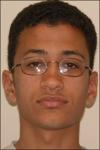

In [20]:
cv2_imshow(cv2.imread(x_train[0]))

In [ ]:
i=0
cv2.imread(x_train[i])

In [37]:
x_train

0      /content/DrMarwa/P0101.jpg
1      /content/DrMarwa/P0102.jpg
2      /content/DrMarwa/P0103.jpg
3      /content/DrMarwa/P0104.jpg
4      /content/DrMarwa/P0105.jpg
                  ...            
581    /content/DrMarwa/P8401.jpg
582    /content/DrMarwa/P8402.jpg
583    /content/DrMarwa/P8403.jpg
584    /content/DrMarwa/P8404.jpg
585    /content/DrMarwa/P8405.jpg
Name: imgPath, Length: 420, dtype: object

In [38]:
testX = []
for i in x_test:
  testX.append(cv2.imread(i))

In [ ]:
del testX

In [39]:
trainX = []
for i in x_train:
  trainX.append(cv2.imread(i))

In [46]:
for i in range(len(trainX)):
  trainX[i]=trainX[i].flatten().tolist()

In [44]:
for i in range(len(testX)):
  testX[i]=testX[i].flatten().tolist()

In [ ]:
testX[0]

In [52]:
df_train = pd.DataFrame({'X_train':trainX})

In [53]:
df_test = pd.DataFrame({'X_test':testX})

In [47]:
model = SVC()

In [58]:
model.fit(trainX,y_train)

SVC()

In [59]:
ypred=model.predict(testX)

In [60]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       0.67      1.00      0.80         2
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         2
           9       0.25      0.50      0.33         2
          10       0.00      0.00      0.00         2
          11       0.67      1.00      0.80         2
          12       0.50      0.50      0.50         2
          13       1.00      0.50      0.67         2
          14       0.40      1.00      0.57         2
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       1.00      1.00      1.00         2
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
cm = confusion_matrix(y_test,ypred)

<Axes: >

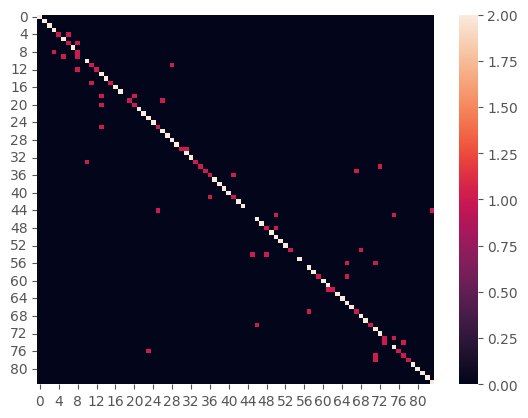

In [62]:
import seaborn as sns
sns.heatmap(cm)